In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Decision tree\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.duplicated().sum()

0

# converting the categorical features into numerical

In [7]:
data=pd.get_dummies(data=data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


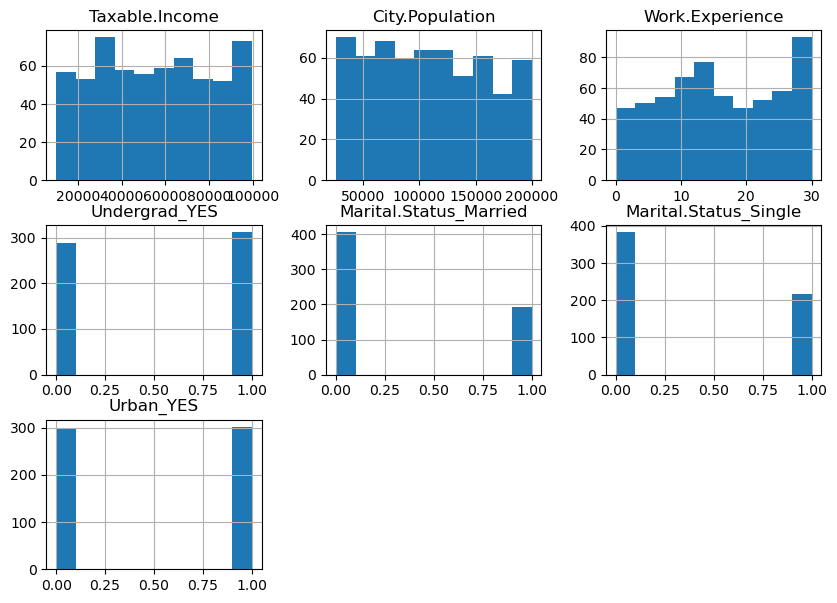

In [9]:
data.hist(figsize=(10,7))
plt.show()

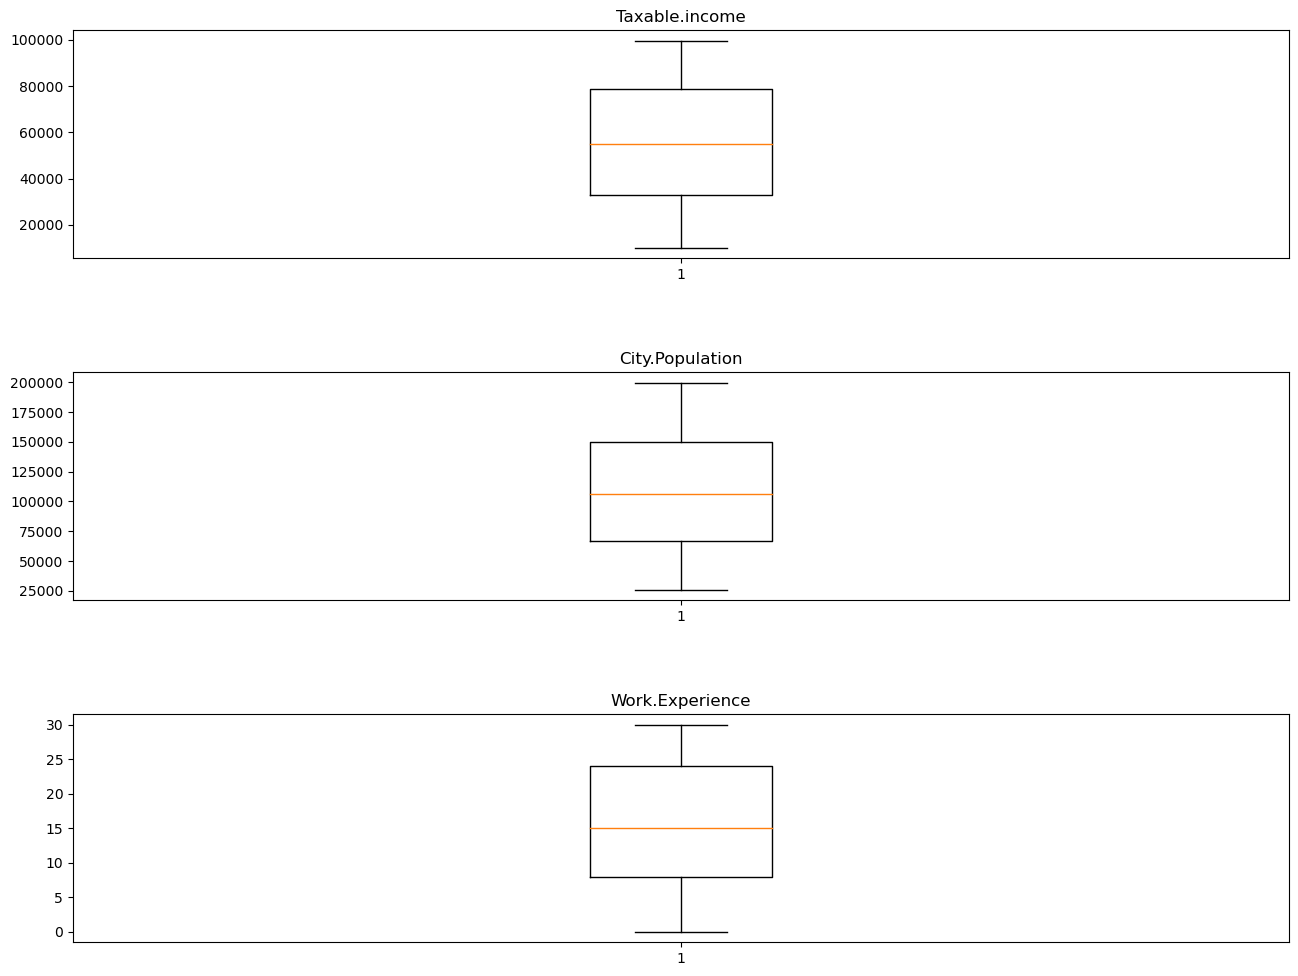

In [10]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,1,1)
plt.boxplot(data['Taxable.Income'])
plt.title('Taxable.income')
plt.subplot(3,1,2)
plt.boxplot(data['City.Population'])
plt.title('City.Population')
plt.subplot(3,1,3)
plt.boxplot(data['Work.Experience'])
plt.title('Work.Experience')
plt.show()

# There are no outliers in above features

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

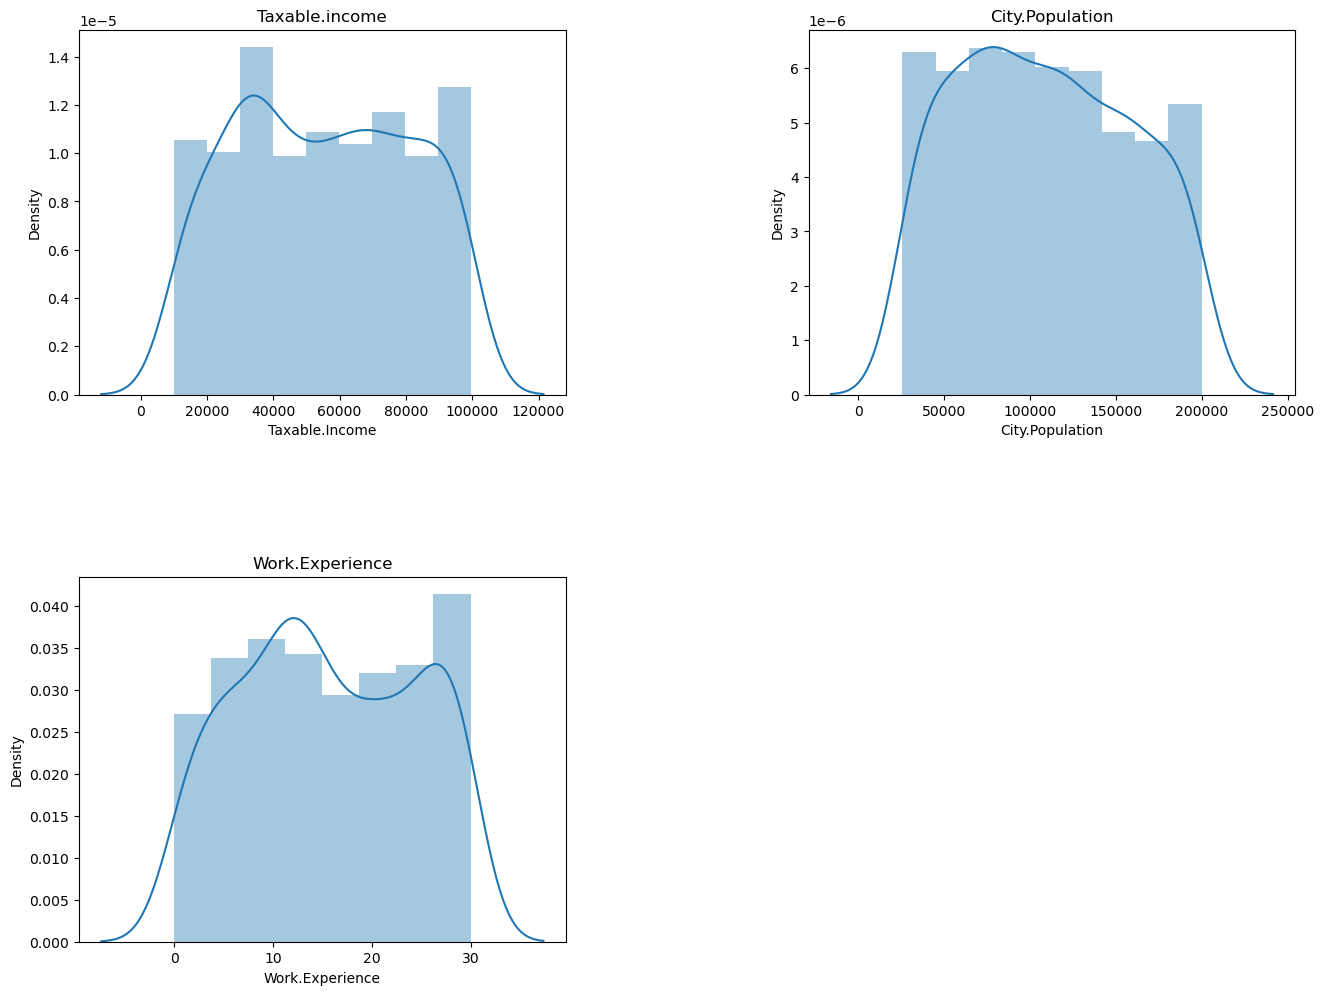

In [11]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(2,2,1)
sns.distplot(data['Taxable.Income'])
plt.title('Taxable.income')
plt.subplot(2,2,2)
sns.distplot(data['City.Population'])
plt.title('City.Population')
plt.subplot(2,2,3)
sns.distplot(data['Work.Experience'])
plt.title('Work.Experience')
plt.show()

In [12]:
#all above features are asymmetrical which are skewed
#doesnt follow gaussian distribution

# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [13]:
data['Tax_inc']=pd.cut(data['Taxable.Income'],bins = [10002,30000,99620], labels = ["Risky", "Good"])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_inc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


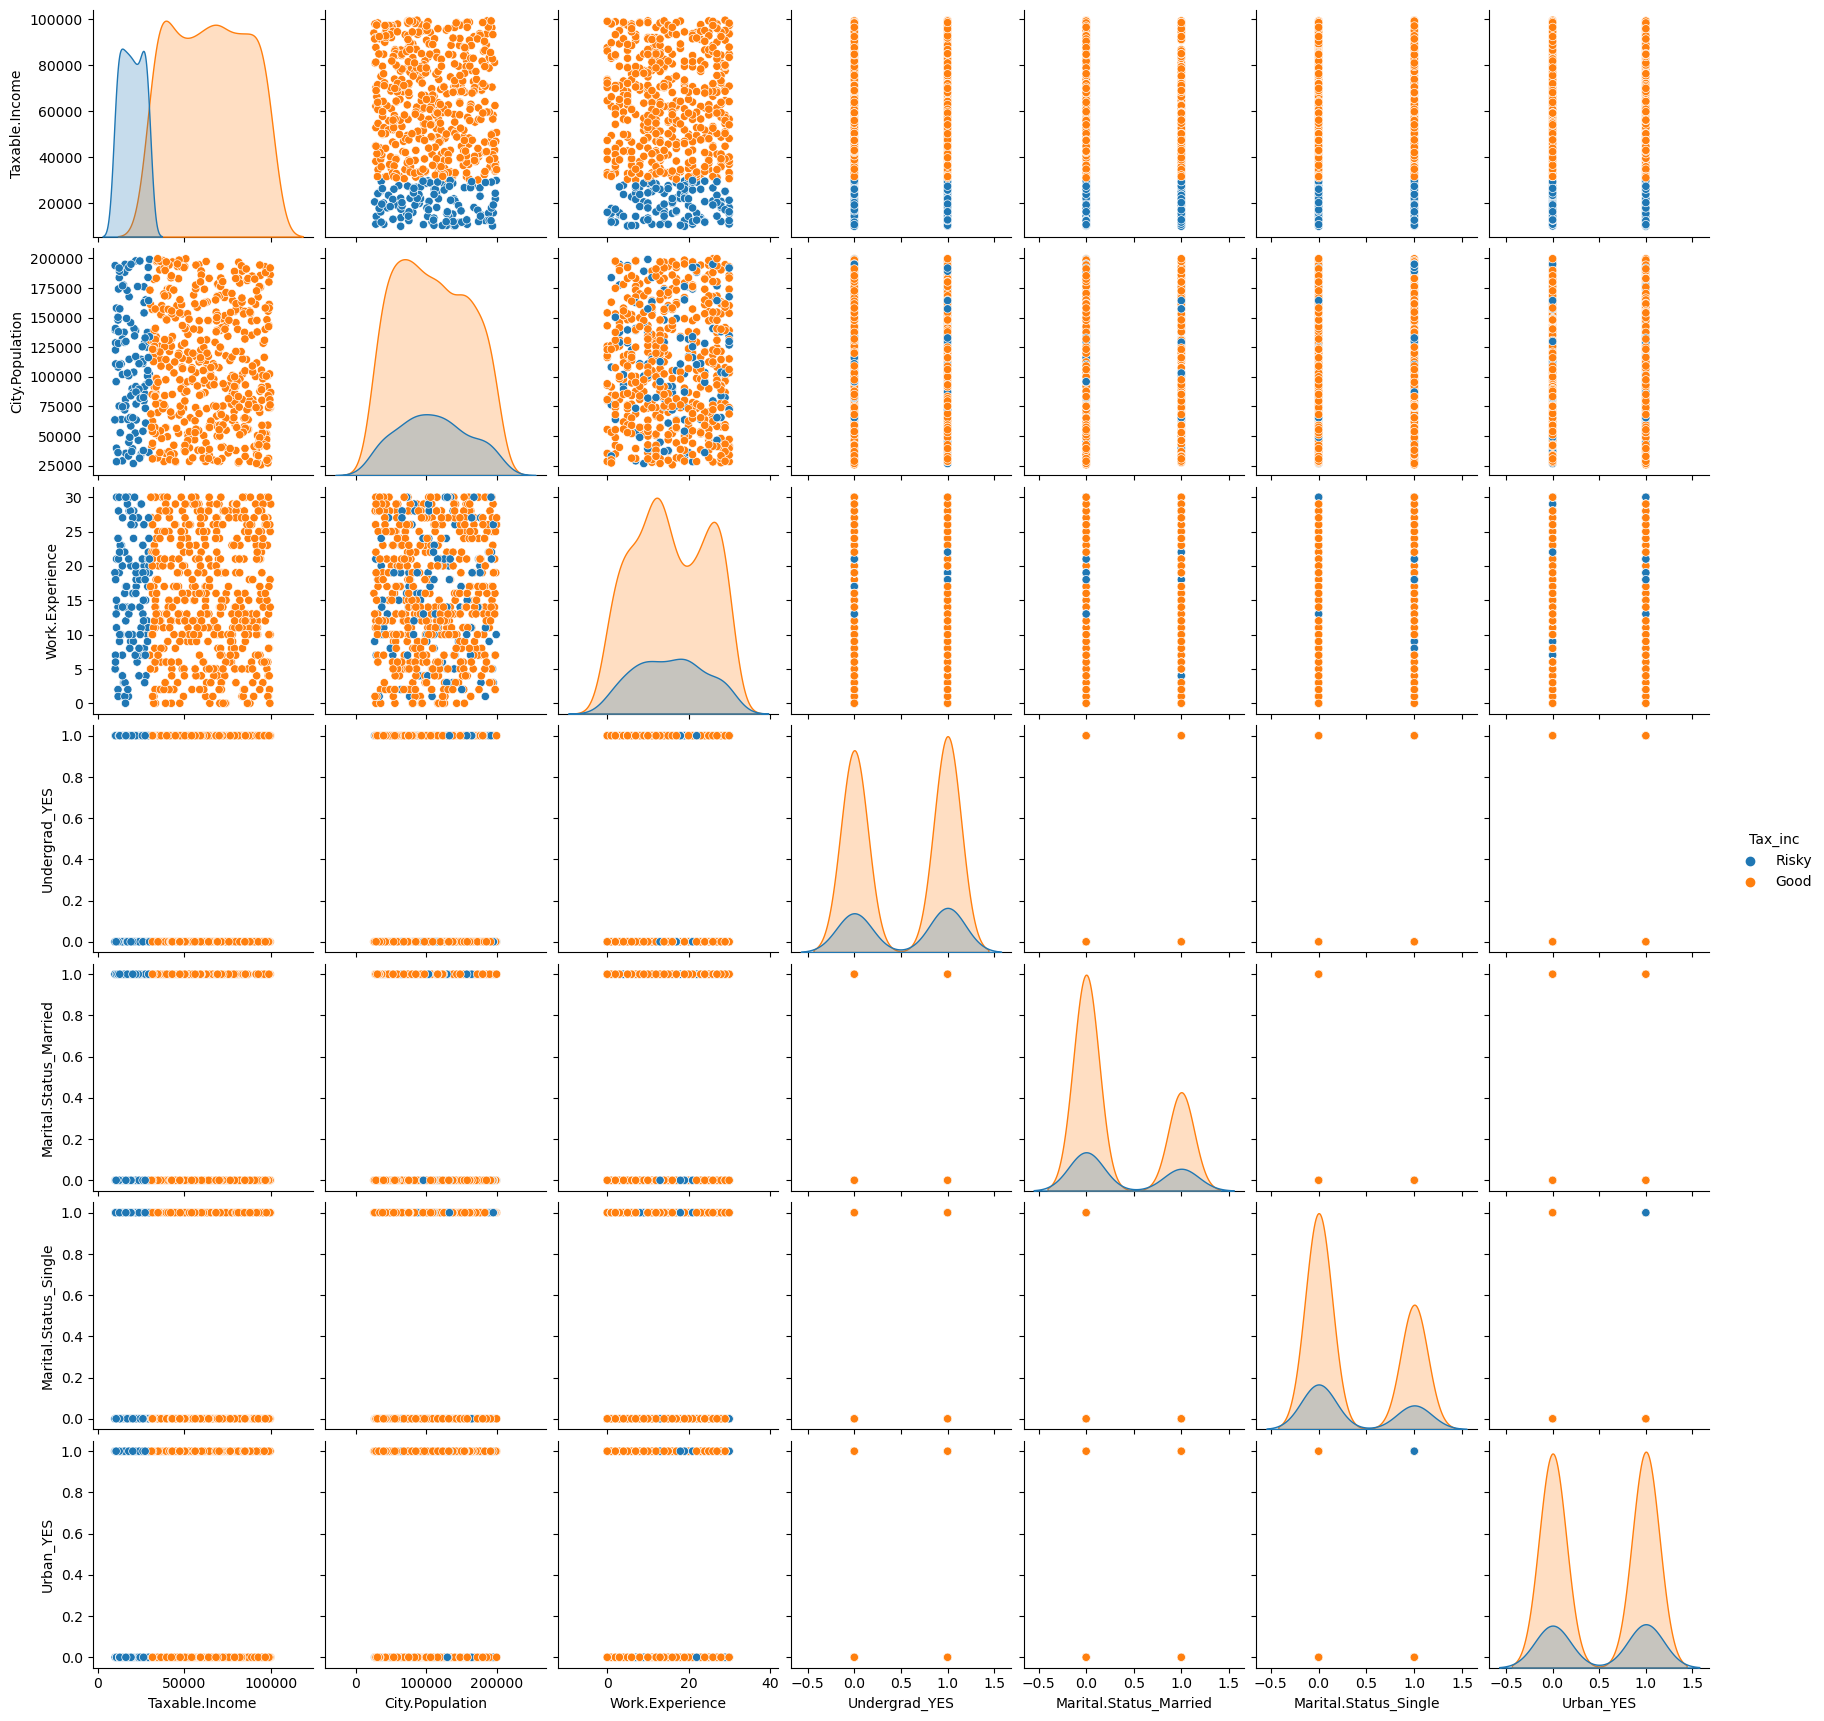

In [14]:
sns.pairplot(data=data,hue='Tax_inc')
plt.show()

In [15]:
data['Tax_inc']=pd.get_dummies(data['Tax_inc'],drop_first=True)

In [16]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_inc
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


# Normalization

In [17]:
 def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
data1=norm_func(data.iloc[:,1:])
data1

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_inc
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [19]:
# Declaring features & target
x = data1.drop(['Tax_inc'], axis=1)
y =data1['Tax_inc']

In [20]:
y.value_counts()

1.0    476
0.0    124
Name: Tax_inc, dtype: int64

# train test split data

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# model building using Random forest

In [49]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(np.mean(y_pred==y_test))

0.7416666666666667


# Grid search to find the best hyper parameters

In [ ]:
from sklearn.model_selection import GridSearchCV 
g_model=RandomForestClassifier() 
param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}) 
grid=GridSearchCV(g_model,param_grid) 
grid.fit(x,y)
print(grid.bestscore) 
print(grid.bestparams)

# building New model using random forest

In [68]:
modelb_1=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb_1.fit(x,y)
pred=modelb_1.predict(x)
print(np.mean(y==pred))

0.7933333333333333


In [78]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x_train,y_train)
pred_1=modelb.predict(x_train)
print(np.mean(y_train==pred_1))

0.7958333333333333


In [79]:
pred_2=modelb.predict(x_test)
print(np.mean(y_test==pred_2))

0.7833333333333333


### After tuning the hyperpaarmeter the accuracy has been incresed from 74.16% to 78.33%

# KFold cross validation

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())


0.7933333333333332


# Confusion matrix

In [85]:
confusion_matrix=metrics.confusion_matrix(y_test,pred_2)
confusion_matrix

array([[ 0, 26],
       [ 0, 94]], dtype=int64)

In [83]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



# ROC curve

In [66]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve
import sklearn.metrics as metrics

In [88]:
cm =metrics.confusion_matrix(y_train, pred_1) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[  0  98]
 [  0 382]]


0.5


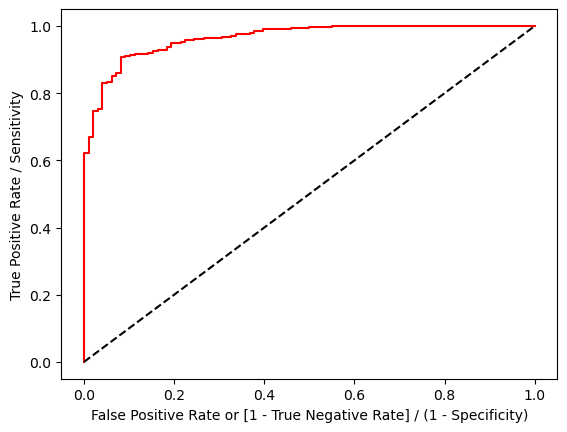

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, modelb.predict_proba(x_train)[:,1])

auc = roc_auc_score(y_train, pred_1)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

0.5


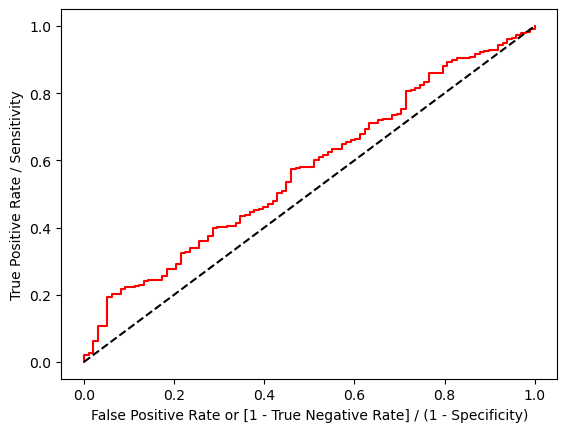

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
prediction=classifier.predict(x_train)
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict_proba(x_train)[:,1])

auc = roc_auc_score(y_train, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

In [ ]:
# bagging

In [ ]:
# ADABOOST 

In [55]:
from sklearn.ensemble import AdaBoostClassifier
model_A=AdaBoostClassifier(base_estimator=modelb)
kfold=KFold(n_splits=10)
results=cross_val_score(model_A,x,y,cv=kfold)
print(results.mean())


0.76


In [63]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model_grad=GradientBoostingClassifier()
model_grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
mode

# Voting classifier

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [59]:
print(results.mean())

0.7933333333333332


In [61]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333332
